<a href="https://colab.research.google.com/github/ParthSharma1197/Capstone-Project-Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Online Retail Customer Segmentation </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

## **First Things First**

We will mount the drive and import libraries those are required throughout the course of our analysis.

In [1]:
# mounting the drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importing the modules that will be required over the course of flow throughout this project
import numpy as np
import pandas as pd
import math
import datetime as dt


from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale, StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from IPython.display import display_html 


import warnings
warnings.filterwarnings("ignore")

# **Loading Dataset**

In [3]:
#importing the dataset in our colab envirnoment
working_dir_path ="/content/drive/MyDrive/Colab Notebooks/CAPSTONE -Online Retail Customer Segmentation/Online Retail.xlsx"
df=pd.read_excel(working_dir_path)

#  **Initial Data review**

In [4]:
# Let's have a look first five rows of our dataset to have a lookover
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
## Let's have a look at last five rows of our dataset to have a lookover
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [6]:
## Let's have a look over the number of rows and columns in our dataset
shape=df.shape
print("The data set contains {} Transactions.\nNumber of features are: {}. ".format(shape[0],(shape[1])))

The data set contains 541909 Transactions.
Number of features are: 8. 


In [7]:
## Let's just inspect the dataset for datatypes and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
# Let's check the null values for all the columns
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
# Getting the list of all the features
print("Features of the dataset are:")
df.columns

Features of the dataset are:


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [10]:
#Having a look the number of countries we have data for

#Storing the countries as a set for future use
countries=set(df['Country'].unique())
print(countries)

num_of_countries=df.Country.nunique()
print('Number of countries are:{}'.format(num_of_countries))

{'Brazil', 'Greece', 'Sweden', 'Norway', 'Germany', 'Hong Kong', 'Iceland', 'Belgium', 'Italy', 'Lithuania', 'Lebanon', 'Portugal', 'EIRE', 'Czech Republic', 'Switzerland', 'Poland', 'Netherlands', 'European Community', 'Cyprus', 'France', 'Japan', 'Singapore', 'United Arab Emirates', 'Saudi Arabia', 'Austria', 'Israel', 'Canada', 'Bahrain', 'Denmark', 'United Kingdom', 'Channel Islands', 'RSA', 'Unspecified', 'Spain', 'Australia', 'Malta', 'USA', 'Finland'}
Number of countries are:38


In [11]:
#Getting the statistical Summary of our dataset
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


We can see the minimum value in the Quantity is negative.Therefore, we must look for these negative values.

In [12]:
# Number of records with negative quantity
neg_quantity=df.Quantity[df.Quantity < 0 ].count()
print("There are total {} record where the quantity is negative.".format(neg_quantity))

There are total 10624 record where the quantity is negative.


In [13]:
# Quick inspection of top records with Negative Quantity
df.loc[df.Quantity < 0].sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
38454,C539576,22896,PEG BAG APPLES DESIGN,-12,2010-12-20 12:25:00,2.55,14911.0,EIRE
445079,C574753,22720,SET OF 3 CAKE TINS PANTRY DESIGN,-2,2011-11-07 09:20:00,4.95,13924.0,United Kingdom
64606,C541656,21528,DAIRY MAID TRADITIONAL TEAPOT,-1,2011-01-20 12:07:00,6.95,17315.0,United Kingdom
383082,C569996,23268,SET OF 2 CERAMIC CHRISTMAS REINDEER,-12,2011-10-06 20:38:00,1.45,15322.0,United Kingdom
32385,C539066,37449,CERAMIC CAKE STAND + HANGING CAKES,-1,2010-12-15 16:54:00,9.95,17912.0,United Kingdom
410563,C572109,23397,FOOT STOOL HOME SWEET HOME,-1,2011-10-20 18:24:00,9.95,13350.0,United Kingdom
108303,C545525,22969,HOMEMADE JAM SCENTED CANDLES,-86,2011-03-03 13:11:00,1.25,12415.0,Australia
447631,C574955,20979,36 PENCILS TUBE RED RETROSPOT,-16,2011-11-08 09:56:00,1.25,15066.0,United Kingdom
367284,C568879,23204,CHARLOTTE BAG APPLES DESIGN,-50,2011-09-29 12:38:00,0.72,14680.0,United Kingdom
156892,C550181,21394,RED POLKADOT BEAKER,-12,2011-04-14 17:43:00,0.39,13069.0,United Kingdom


In [14]:
#Let's have a look at the most expensive item in the store.
df[df.UnitPrice == df.UnitPrice.max()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.0,15098.0,United Kingdom


### **From the above review on dataset we have some observations:**


1. Most Invoices appear as normal transcations with positive quantity and prices, but there are some  values in the quantity column that are addressed as negative quatity posses invoice number starting with 'C',therefore all these belong to cancelled orders.
2. Empty or Null values are in CustomerID are around 135080 that need to be treated.
3. Here we have a data for 38 different countries.
4. There are total 10624 record where the quantity is negative.
5. Average Unit price of all the items in the store is coming out to be 4.6 sterling.
6. Most expensive item in the store is Manual,whose cost is 38970 sterling and that too is a cancelled order.
7. We should further break-down the InvoiceDate column to draw some more insights.


## **Data Pre-processing**

### **1.Treating the Missing Values/Null-Values**

In [15]:
## Checking for missing values
null_val=df.isna().sum()
print('Missing Data Count :')
print(null_val)

Missing Data Count :
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


Text(0.5, 1.0, 'Percentage of missing values per columns')

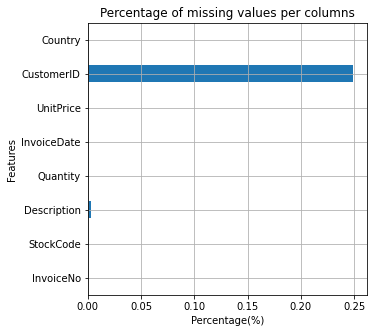

In [16]:
#Plot to show the percentage of missing values n the data set
plt.figure(figsize=(5, 5))

df.isnull().mean(axis=0).plot.barh()

plt.grid()
plt.xlabel("Percentage(%)")
plt.ylabel("Features")
plt.title("Percentage of missing values per columns")

Maximum number of missing values are coming from customer_id and we will drop such values.

## Dropping the Null Values

In [17]:
#Dropping the null values in the dataset
df.dropna(subset=['CustomerID'],inplace=True)

Text(0.5, 1.0, 'Percentage of missing values per columns')

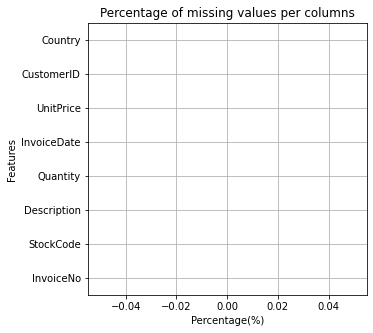

In [18]:
#Let's see the applied changes through the plot:
plt.figure(figsize=(5, 5))

df.isnull().mean(axis=0).plot.barh()

plt.grid()
plt.xlabel("Percentage(%)")
plt.ylabel("Features")
plt.title("Percentage of missing values per columns")


In [19]:
# Check for the shape of the dataset after droppinng the null values:
print("Shape of the data set after dropping the null values is:\n{}".format(df.shape))

Shape of the data set after dropping the null values is:
(406829, 8)


#### **Hence,we have sucessfully treated the null values dataset**

### **2. Checking for the Duplicate values:**

In [20]:
# Checking for duplicates in our dataset
# duplicate=df.duplicated().any()
if df.duplicated().any():
    print("Duplicate Rows in our dataset are: {}".format(df.duplicated().sum()))
else:
    print("There are no duplicate records present in our dataset")

Duplicate Rows in our dataset are: 5225


If two records are same,the StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country but invoice number cannot be same therefore we must drop the duplicate records.

## Drop the Duplicate values from the dataset

In [21]:
#Drop the duplicated values
df.drop_duplicates(inplace=True)
print("Shape of the data set after dropping the duplicates is :\n{}".format(df.shape))

Shape of the data set after dropping the duplicates is :
(401604, 8)


# **EDA and Visualzation**



In [22]:
#Let's have a look at number of unique values in each feature 
features=df.columns
features

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [23]:
#Let's have a look at the unique values in each column
for feature in features:
    print(feature,':')
    print(df[feature].nunique())
    print("-----------------")

InvoiceNo :
22190
-----------------
StockCode :
3684
-----------------
Description :
3896
-----------------
Quantity :
436
-----------------
InvoiceDate :
20460
-----------------
UnitPrice :
620
-----------------
CustomerID :
4372
-----------------
Country :
37
-----------------


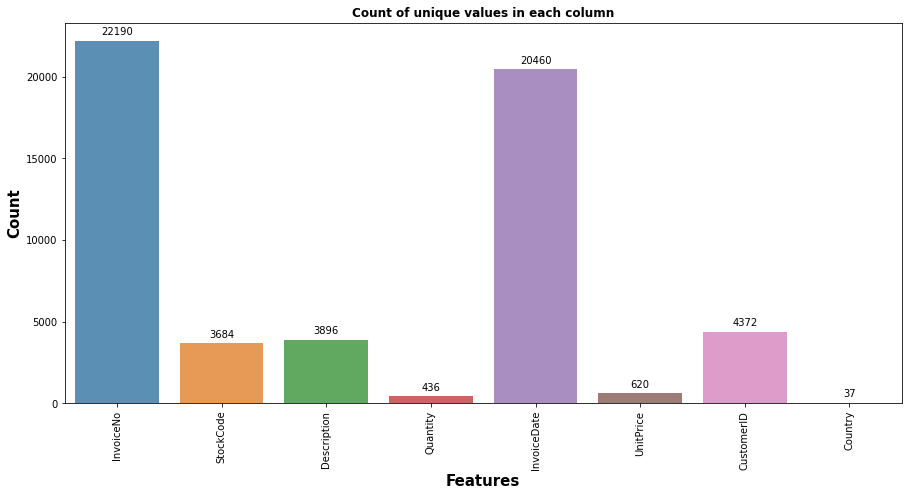

In [24]:
#Let's understand the unique values through visualization

#Let's create a dataframe for the number of unique values 
df_nunique=pd.DataFrame()
df_nunique['Features']=df.columns
unique=[]
for i in df.columns:
  unique.append(df[i].nunique())
df_nunique['Uniques']=unique

# Plot the bar plot for the above results
f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=df_nunique['Features'], y=df_nunique['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Count of unique values in each column',weight='bold')
plt.ylabel('Count', size=15, weight='bold')
plt.xlabel('Features', size=15, weight='bold')
plt.xticks(rotation=90)
plt.show()

1. Although our dataset has initially 541909 records but the number of unique invoices generated are very less.
2. The number of unique countries available with us are 37 but before we did data preprocessing it was 38.We must look for the country that has vanished from the data.

In [25]:
#Getting the unique number of countries after the data preprocessing
countries_final=set(df.Country.unique())

#Let's just find the country that got vanished from the dataset
country_leftout=countries-countries_final
country_leftout

{'Hong Kong'}

Therefore,HonKong that got vanished away in the data preprocessing stage.

### **Top 10 Countries w.r.t The Number Of Invoices Generated**

In [26]:
#Let's create a dataframe 
country_df = df.groupby('Country')[['InvoiceNo']].nunique().sort_values(by='InvoiceNo', ascending=False).head(10).reset_index()
country_df

,Country,InvoiceNo
0,United Kingdom,19857
1,Germany,603
2,France,458
3,EIRE,319
4,Belgium,119
5,Spain,105
6,Netherlands,101
7,Switzerland,71
8,Portugal,70
9,Australia,69


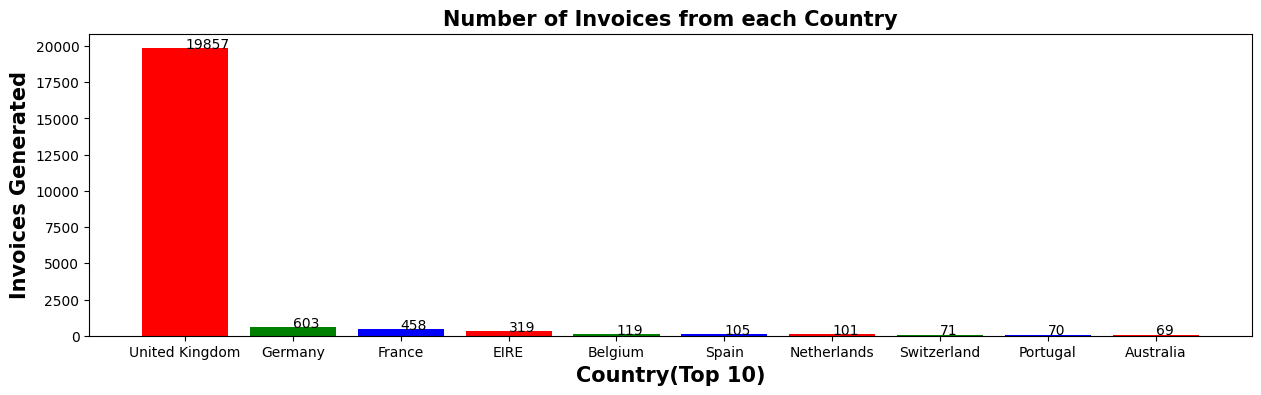

In [27]:
# Let's learn through the visualization
fig, ax = plt.subplots(figsize=(15,4),dpi=100)
plt.style.use('seaborn-colorblind')


# Define x and y 
x=country_df['Country']
y=country_df['InvoiceNo']

# Plot the bar plot
plt.bar(x,y,color="rgb")

# Function to set label
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

addlabels(x,round(y,2))

# set xlabel. ylabel and title
plt.xlabel("Country(Top 10)", weight="bold",size=15)
plt.ylabel("Invoices Generated",weight="bold",size=15)
plt.title("Number of Invoices from each Country",weight="bold",size=15)

## Showing the plot
plt.show()

### **Top 10 Countries w.r.t The Number Of Orders Sucessfully Generated** 





In [28]:
## Generating the dataframe of country w.r.t the Sucessfull orders generated
sales_df = df[~df['InvoiceNo'].str.startswith('C',na=False)].groupby('Country')[['InvoiceNo']].nunique().sort_values(by='InvoiceNo', ascending=False).head(10).reset_index()
sales_df

,Country,InvoiceNo
0,United Kingdom,16649
1,Germany,457
2,France,389
3,EIRE,260
4,Belgium,98
5,Netherlands,95
6,Spain,90
7,Australia,57
8,Portugal,57
9,Switzerland,51


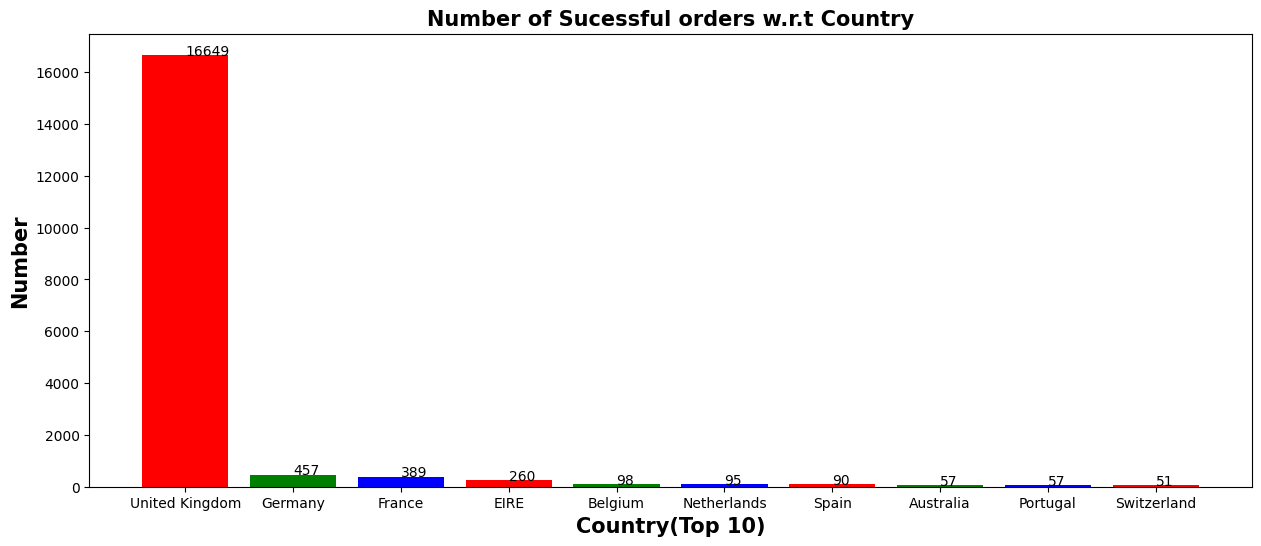

In [29]:
# Let's learn through the visualization
fig, ax = plt.subplots(figsize=(15,6),dpi=100)
plt.style.use('seaborn-colorblind')

# Define x and y 
x=sales_df['Country']
y=sales_df['InvoiceNo']

# Plot the bar plot
plt.bar(x,y,color="rgb")

# Function to set label
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

addlabels(x,round(y,2))

# set xlabel. ylabel and title
plt.xlabel("Country(Top 10)", weight="bold",size=15)
plt.ylabel("Number", weight="bold",size=15)
plt.title("Number of Sucessful orders w.r.t Country", weight="bold",size=15)

## Showing the plot
plt.show()

## **Cancelled Items**

From the description,If this code starts with letter 'C', it indicates a cancellation.

In [30]:
# Transactions with Cancelled Items.
cancelled = df[df.InvoiceNo.str.contains('C',na=False)]
cancelled.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [31]:
#Creating the dataframe for cancelled orders
cancelled_orders=cancelled[['InvoiceNo','Country']].groupby('Country').count().sort_values(by='InvoiceNo', ascending=False).head(10).reset_index()

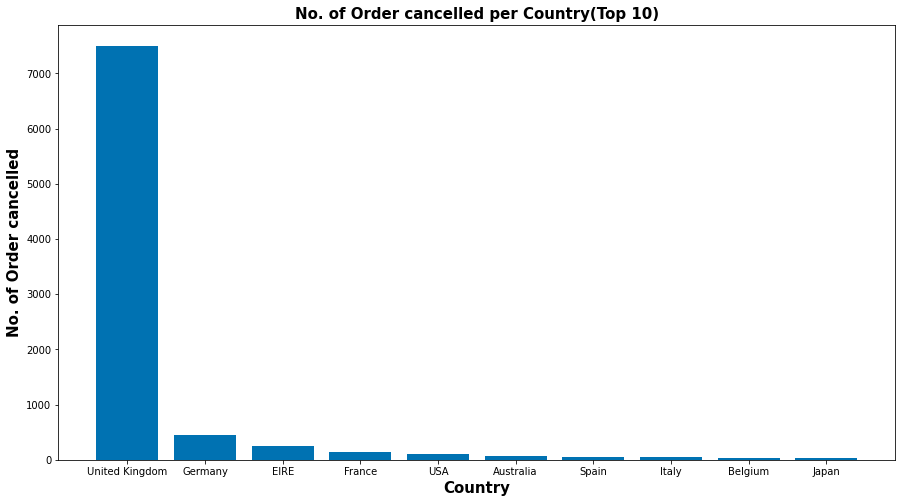

In [32]:
# Learning through visualization
# Figure Size
plt.figure(figsize=(15,8))

## Define x and y axis
x=cancelled_orders['Country']
y=cancelled_orders['InvoiceNo']

# creating the bar plot
plt.bar(x,y)

# set xlabel. ylabel and title
plt.xlabel("Country", size=15, weight='bold')
plt.ylabel("No. of Order cancelled", size=15, weight='bold')
plt.title("No. of Order cancelled per Country(Top 10)",size=15, weight='bold')

## Showing the plot
plt.show()



1. United Kingdom has got the maximum number cancelled orders followed by Germany with considerable margin.
2. Australia,Spain,Italy,Belgium,Japan has least and almost negligible amount of cancelled orders.   

In [33]:
#Taking only invoices which were not cancelled
df = df[~df["InvoiceNo"].str.contains("C", na=False)]

#Taking only postive values from variables
df = df[df['Quantity']>0]
df = df[df['UnitPrice']>0]
df.shape

(392692, 8)

Majority of the transactions are from United Kingdom,other countries are costitute very small proportions in order to make our segmentation clean we will be going ahead with the United Kingdom data only.

In [34]:
# Filtering the dataset 
uk_data = df.loc[df['Country'] == 'United Kingdom']


## **Feature Engineering and EDA On New Features** 

In [35]:
# Adding new features month , day and hour from invoice date
uk_data['Invoice_day'] = uk_data['InvoiceDate'].dt.day_name()
uk_data['Invoice_hour'] = uk_data['InvoiceDate'].dt.hour 
uk_data['Invoice_month']=uk_data['InvoiceDate'].dt.to_period('M')
uk_data['month']=uk_data['InvoiceDate'].dt.month_name()
uk_data['purchase_date']=uk_data["InvoiceDate"].dt.date

In [36]:
uk_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_day,Invoice_hour,Invoice_month,month,purchase_date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,8,2010-12,December,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,8,2010-12,December,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,8,2010-12,December,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,8,2010-12,December,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,8,2010-12,December,2010-12-01


In [37]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349203 entries, 0 to 541893
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      349203 non-null  object        
 1   StockCode      349203 non-null  object        
 2   Description    349203 non-null  object        
 3   Quantity       349203 non-null  int64         
 4   InvoiceDate    349203 non-null  datetime64[ns]
 5   UnitPrice      349203 non-null  float64       
 6   CustomerID     349203 non-null  float64       
 7   Country        349203 non-null  object        
 8   Invoice_day    349203 non-null  object        
 9   Invoice_hour   349203 non-null  int64         
 10  Invoice_month  349203 non-null  period[M]     
 11  month          349203 non-null  object        
 12  purchase_date  349203 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(7), period[M](1)
memory usage: 37.3+ MB


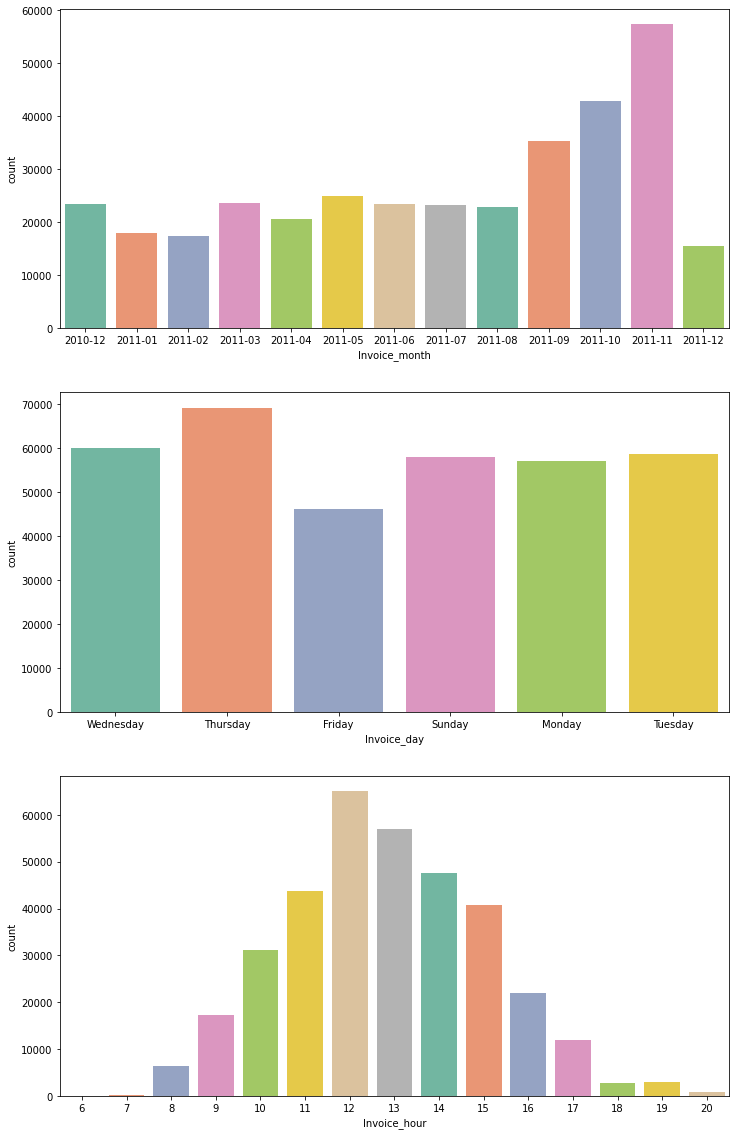

In [38]:
columns = ['Invoice_month','Invoice_day','Invoice_hour']
fig = plt.figure(figsize=(12,20))
for i in range(len(columns)):
  col=columns[i]
  sub=fig.add_subplot(3,1,i+1)
  chart = sns.countplot(data=uk_data,x=col,palette="Set2")

## Observations:
1. Maximum amount of invoices were generated in the month of November in 2011 that crosses almost 6000 numbers.
2. Talking about day of the week,Thursday can be regarded as the most rushed day in the whole week.
3. Maximum rush was observed in the mid-day i.e. between 12 hrs to 14 hrs. 

In [39]:
# Calculate total price and add to the dataframe
uk_data["Total_sales"] = uk_data["UnitPrice"]*uk_data["Quantity"]

In [40]:
# Looking at the applied changes
uk_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_day,Invoice_hour,Invoice_month,month,purchase_date,Total_sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,8,2010-12,December,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,8,2010-12,December,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,8,2010-12,December,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,8,2010-12,December,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,8,2010-12,December,2010-12-01,20.34


In [41]:
## Generating the dataframe of country w.r.t the Revenue generated
Top10_Country_revenue=uk_data.groupby('Country')['Total_sales'].sum().reset_index().sort_values('Total_sales',ascending=False).head(10)
Top10_Country_revenue

,Country,Total_sales
0,United Kingdom,7285024.644


<Figure size 864x432 with 0 Axes>

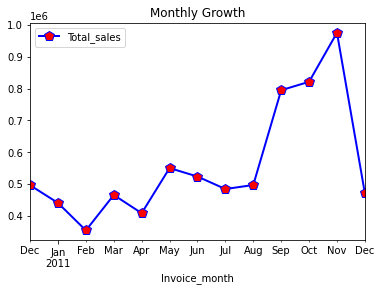

In [42]:
#Let's plot the Monthly growth
plt.figure(figsize = (12,6))
tsales_month = uk_data.groupby('Invoice_month').Total_sales.sum().reset_index()
tsales_month.plot.line(x='Invoice_month',y='Total_sales',title='Monthly Growth',color = 'b',marker='p', markersize=10, linewidth=2,markerfacecolor='red')

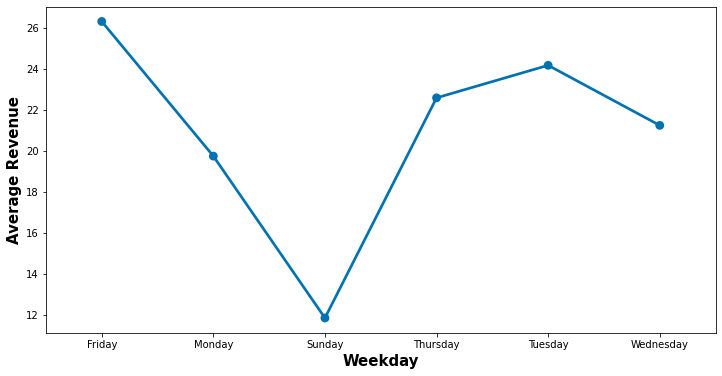

In [43]:
#Bussiest day of the week
tsales_weekday = uk_data.groupby('Invoice_day').Total_sales.mean()
plt.figure(figsize = (12,6))
sns.pointplot(x=tsales_weekday.index, y=tsales_weekday.values)
plt.ylabel('Average Revenue',weight="bold",size=15)
plt.xlabel('Weekday',weight="bold",size=15)
plt.show()

## **Observation:**
1. Maximum average revenue was observed to be on the Thursday and Friday,On Tuesday also the revenue generated was comparitive.
2. Minimum average revenue was generated on Sundays. 

### **Top 20 Products Sold From the Store**

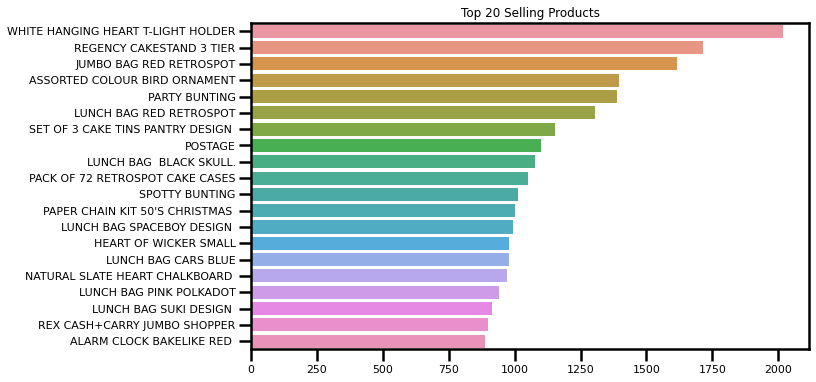

In [44]:
# Creating the required Dataframe
top_products = df['Description'].value_counts()[:20]
plt.figure(figsize=(10,6))

# Plotting the plot
sns.set_context("poster",font_scale=0.5)
sns.barplot(y=top_products.index,x=top_products.values)
plt.title('Top 20 Selling Products')
plt.show()

White Hanging Heart T-light holder is the top selling item followed by Regency Cakestand 3 Tier.

In [45]:
#changing the datatype of the Customer id
uk_data['CustomerID'] = uk_data['CustomerID'].astype('int64')
#changing the datatype of the purchase_date
uk_data['purchase_date']=uk_data['purchase_date'].astype('datetime64[ns]')

In [46]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349203 entries, 0 to 541893
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      349203 non-null  object        
 1   StockCode      349203 non-null  object        
 2   Description    349203 non-null  object        
 3   Quantity       349203 non-null  int64         
 4   InvoiceDate    349203 non-null  datetime64[ns]
 5   UnitPrice      349203 non-null  float64       
 6   CustomerID     349203 non-null  int64         
 7   Country        349203 non-null  object        
 8   Invoice_day    349203 non-null  object        
 9   Invoice_hour   349203 non-null  int64         
 10  Invoice_month  349203 non-null  period[M]     
 11  month          349203 non-null  object        
 12  purchase_date  349203 non-null  datetime64[ns]
 13  Total_sales    349203 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(6

In [47]:
#Removing the features that are not required for RFM 			
uk_data.drop(['Invoice_day','Invoice_hour','Invoice_month','month'],axis=1,inplace=True)

## **Create the RFM model (Recency, Frequency,Monetary value)**
Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors: . Frequency: How often a customer makes a purchase. Monetary Value: How much money a customer spends on

Performing RFM Segmentation and RFM Analysis, Step by Step
The first step in building an RFM model is to assign Recency, Frequency and Monetary values to each customer.The second step is to divide the customer list into tiered groups for each of the three dimensions (R, F and M).

Let's define Recency, Frequency and Monetary metrics that milestones for RFM Analysis process


1. Recency => How recent was the customer's last purchase?  Number of days between analysis date and last invoice date

2. Frequency=> How often did this customer make a purchase in a given period? Number of purchases.

3. Monetary  =>  How much money did the customer spend in a given period? In other words , How much money will the company potentially earn from a particular customer?

----> For recency,  we should know the newest date of invoice in our dataset. According to that date, we can specify analysis date which will be using for next steps of our analysis.

In [48]:
# knowing the latest date in our transaction history
uk_data["purchase_date"].max()

Timestamp('2011-12-09 00:00:00')

Maximum date is 2011-12-09 , Instead of using today date, we decide the most rational date , so we choose 2 days later of maximum date i.e. 2011-12-11.

In [49]:
#choosing selected date in the ame of today's date
today_date = dt.datetime(2011, 12, 11)

In [50]:
# Creating the RFM dataframe
rfm = uk_data.groupby(['CustomerID'],as_index=False).agg({'purchase_date': lambda purchase_date: (today_date - purchase_date.max()).days,
                                     'InvoiceNo': lambda InvoiceNo: InvoiceNo.count(),
                                     'Total_sales': lambda Total_sales: Total_sales.sum()}).rename(columns = {'purchase_date': 'recency',
                                                                                   'InvoiceNo': 'frequency',
                                                                                   'Total_sales': 'monetary'})

In [51]:
# Having a look at the initial records of the dataset
rfm.head()

,CustomerID,recency,frequency,monetary
0,12346,327,1,77183.60
1,12747,4,103,4196.01
2,12748,2,4412,33053.19
3,12749,5,199,4090.88
4,12820,5,59,942.34


## Customer Segmentation Using Quantiles
Now that we have our values,we need to divide the customers into different quartiles for recency, frequency and monetary, and concatenating the numbers of each quartile.

In [52]:
#Split into four segments using quantiles
quantiles = rfm.quantile(q=[0.25,0.5,0.75])

#Convert the quantile to dictionary
quantiles = quantiles.to_dict()
quantiles

{'CustomerID': {0.25: 14208.75, 0.5: 15569.5, 0.75: 16913.25},
 'frequency': {0.25: 17.0, 0.5: 40.0, 0.75: 98.0},
 'monetary': {0.25: 298.18500000000006,
  0.5: 644.9749999999999,
  0.75: 1571.285},
 'recency': {0.25: 19.0, 0.5: 52.0, 0.75: 144.0}}

In [53]:
#Functions to create R, F and M segments.

def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [54]:
# Now assign segments to customers using the abobe function
rfm['r_quartile'] = rfm['recency'].apply(RScore, args=('recency',quantiles,))
rfm['f_quartile'] = rfm['frequency'].apply(FMScore, args=('frequency',quantiles,))
rfm['m_quartile'] = rfm['monetary'].apply(FMScore, args=('monetary',quantiles,))

In [55]:
# Let's ahve a look for the applied changes
rfm.head()

,CustomerID,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
0,12346,327,1,77183.60,4,4,1
1,12747,4,103,4196.01,1,1,1
2,12748,2,4412,33053.19,1,1,1
3,12749,5,199,4090.88,1,1,1
4,12820,5,59,942.34,1,2,2


## **Interpretation of the segment in which the customer lies:**

A score of 111 would be the highest achievable score, and a score of 444 the worst.

*   ### **Best customers :**
    *   RFM Score: 111:  

        They are the cream customers who have bought the most recent, the most often, and generated the most revenue.



*    ### **Big Spenders :**
     *   RFM Score: XX1

         These are the customers who have generated the most revenue for your store as the montery equals 1 that is the maximum score for monetay.

*    ### **Loyal customers**
     *   RFM Score: X1X

         They are the customers who arrive the most at the store to shop as there frequency equals 1 and the accounts the best rating.


In [56]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm['RFMGroup'] = rfm.r_quartile.map(str) + rfm.f_quartile.map(str) + rfm.m_quartile.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm['RFMScore'] = rfm[['r_quartile', 'f_quartile', 'm_quartile']].sum(axis = 1)
rfm.head()

,CustomerID,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFMGroup,RFMScore
0,12346,327,1,77183.60,4,4,1,441,9
1,12747,4,103,4196.01,1,1,1,111,3
2,12748,2,4412,33053.19,1,1,1,111,3
3,12749,5,199,4090.88,1,1,1,111,3
4,12820,5,59,942.34,1,2,2,122,5


### **Correlation Matrix**

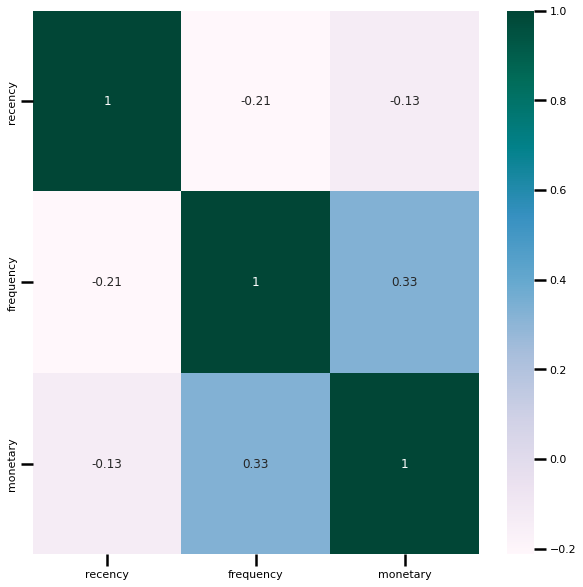

In [57]:
# Generating the correlation matrix
corr_data= rfm[['recency','frequency','monetary']].corr()

# Plotting the correlation Matrix using the heat map
plt.figure(figsize=(10,10))
sns.heatmap(data=corr_data,cmap='PuBuGn',annot=True)
plt.show()

## **Observation from the Correlation Matrix :**

1. Frequency and Monetary are positively correlated with each other,that implies with  an increase in frequency increases monetary value.
2. Frequency and Recency are negatively correlated with each other,that implies increase in frequency decreases monetary value.

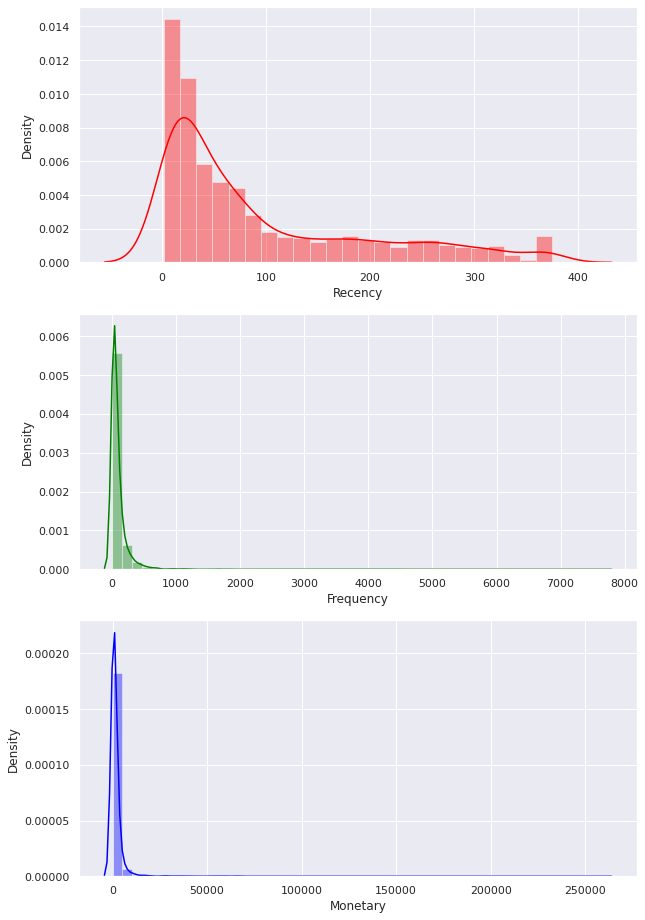

In [58]:
# Plotting the distribution plot before passing in the models

# Distribution plot
plt.figure(figsize=(10,16))
sns.set_theme(style="darkgrid")

# Plot recency 
plt.subplot(3, 1, 1); sns.distplot(rfm.recency,color='Red',axlabel='Recency')

# Plot frequency 
plt.subplot(3, 1, 2); sns.distplot(rfm.frequency,color='Green',axlabel='Frequency')

# Plot monetary value 
plt.subplot(3, 1, 3); sns.distplot(rfm.monetary,color='Blue',axlabel='Monetary')

plt.show()



## **Observations:**
1. From the above plot we can infer that Recency is moderately skewed but Frequency and Monetary are extremely skewed.
2. Recency,Frequency and monetary all are positively skewed.
3. Recency,Frequency and monetary possess outlier values.

We need to treat the outliers and make these distributions normalised before fitting the data into the model.


In [59]:
#performing log tranformation
data_log = np.log(rfm[['recency','frequency','monetary']]+1)



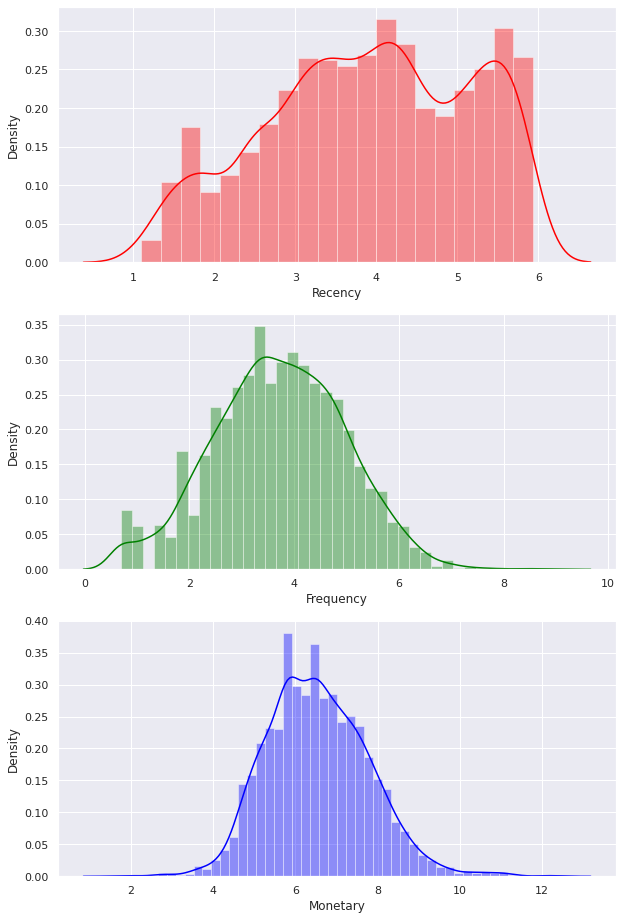

In [60]:
# Plotting the distribution plot before passing in the models

sns.set_theme(style="darkgrid")

# # Distribution and box plot for recency
# sns.distplot(data_log.recency,color='Red',axlabel='Recency',ax=axes[0,0])
# sns.boxplot(data = data_log['recency'], orient="v", palette="Set3" ,whis=1.5,saturation=1, width=0.7,ax=axes[0,1])

# # Distribution and box plot for Frequency
# sns.distplot(data_log.frequency,color='Green',axlabel='Frequency',ax=axes[1,0])
# sns.boxplot(data = data_log['frequency'], orient="v", palette="Set3" ,whis=1.5,saturation=1, width=0.7,ax=axes[1,1])

# # Distribution and box plot for Monetary
# sns.distplot(data_log.monetary,color='Blue',axlabel='Monetary',ax=axes[2,0])
# sns.boxplot(data = data_log['monetary'], orient="v", palette="Set3",whis=1.5,saturation=1, width=0.7,ax=axes[2,1])


plt.figure(figsize=(10,16))

# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(data_log.recency,color='Red',axlabel='Recency')

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(data_log.frequency,color='Green',axlabel='Frequency')

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(data_log.monetary,color='Blue',axlabel='Monetary')

plt.show()



In [61]:
# Scale data
from sklearn.preprocessing import RobustScaler
#from sklearn.preprocessing import StandardScaler

scaler = RobustScaler()
normalized = scaler.fit_transform(data_log)

# Create a pandas DataFrame
norm = pd.DataFrame(data=normalized, index=data_log.index, columns=data_log.columns)
norm

,recency,frequency,monetary
0,0.920101,-1.771772,2.882792
1,-1.191748,0.546015,1.127858
2,-1.449610,2.744533,2.371678
3,-1.099713,0.929607,1.112569
4,-1.099713,0.223360,0.228219
...,...,...,...
3915,0.840230,-0.771772,-0.764788
3916,0.625539,-0.958576,-1.245305
3917,-0.841850,-0.673779,-0.773311
3918,-1.099713,1.682626,0.694988
